<a href="https://colab.research.google.com/github/RachanaAdusumilli95/Text-Analysis/blob/main/BasicTextMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Word Tokenization
============

In [ ]:
text = "The quick brown fox jumped over the lazy dog"
tokens = text.split()
print(tokens)

['The', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']


In [ ]:
text = "The quick brown fox, and an Oxford comma"
tokens = text.split()
print(tokens)

['The', 'quick', 'brown', 'fox,', 'and', 'an', 'Oxford', 'comma']


In [ ]:
from nltk.tokenize import word_tokenize
text = "The quick brown fox, and an Oxford comma"
tokens = word_tokenize(text)
print(tokens)

['The', 'quick', 'brown', 'fox', ',', 'and', 'an', 'Oxford', 'comma']


In [ ]:
from nltk.tokenize import word_tokenize
text = "Tweet about #NLProc @ABCD :)"
tokens = word_tokenize(text)
print(tokens)

['Tweet', 'about', '#', 'NLProc', '@', 'ABCD', ':', ')']


In [ ]:
from nltk.tokenize import TweetTokenizer
text = "Tweet about #NLProc @ABCD :)"
tokenizer = TweetTokenizer()
tokens = tokenizer.tokenize(text)
print(tokens)

['Tweet', 'about', '#NLProc', '@ABCD', ':)']


In [ ]:
from nltk.tokenize import TweetTokenizer
text = "Tweet about #NLProc @ABCD :)"
tokenizer = TweetTokenizer(strip_handles=True)
tokens = tokenizer.tokenize(text)
print(tokens)

['Tweet', 'about', '#NLProc', ':)']


In [ ]:
from nltk.tokenize import word_tokenize
text = "How about currencies (like £100,000.00) and dates (like 19th September)"
tokens = word_tokenize(text)
print(tokens)

['How', 'about', 'currencies', '(', 'like', '£100,000.00', ')', 'and', 'dates', '(', 'like', '19th', 'September', ')']


Stemming
=====

In [ ]:
from nltk.stem import PorterStemmer

s = PorterStemmer()
print(s.stem('Having'))
print(s.stem('Have'))
print(s.stem('Had'))

print(s.stem('Fishing'))
print(s.stem('Fish'))
print(s.stem('Fisher'))
print(s.stem('Fishes'))
print(s.stem('Fished'))

print(s.stem('European'))
print(s.stem('Europe'))

print(s.stem('policy'))
print(s.stem('police'))

print(s.stem('matrix'))
print(s.stem('matrices'))

print(s.stem('automation'))
print(s.stem('automatic'))
print(s.stem('automate'))
print(s.stem('automat'))
print(s.stem('was'))
print(s.stem('saw'))

have
have
had
fish
fish
fisher
fish
fish
european
europ
polici
polic
matrix
matric
autom
automat
autom
automat
wa
saw


Lemmatization
=====

Lemmatisation is similar to stemming, as it produces a normalised version of the input word.

The output is a lemma, i.e. a proper word (different from stemming)

The input word is lemmatised according to its Part-of-Speech (POS) tag, i.e. verb, noun, etc.

In [ ]:
# You'll need the "wordnet" package from NLTK data
# python -m nltk.downloader wordnet
from nltk.stem import WordNetLemmatizer

s = WordNetLemmatizer()
print(s.lemmatize('having', pos='v'))
print(s.lemmatize('have', pos='v'))
print(s.lemmatize('had', pos='v'))

print(s.lemmatize('fishing', pos='v'))
print(s.lemmatize('fish', pos='v'))
print(s.lemmatize('fisher', pos='n'))
print(s.lemmatize('fishes', pos='v'))
print(s.lemmatize('fished', pos='v'))

print(s.lemmatize('am', pos='v'))
print(s.lemmatize('is', pos='v'))
print(s.lemmatize('was', pos='v'))

have
have
have
fish
fish
fisher
fish
fish
be
be
be


# Tokenization, Word Counts, Stop Word removal, and Text Normalization using Italian recipes data

In [ ]:
#Data set of Italian recipes from https://www.gutenberg.org/ebooks/24407 (public domain)
#The txt format of this has been split into multiple files, one recipe per file.
#There are 220 recipes

#Load the data
#Firstly, we load all the data into the documents dictionary
#We also merge the documents into one big string, corpus_all_in_one, for convenience

import os
data_folder = os.path.join('recipes')
all_recipe_files = [os.path.join(data_folder, fname)
                    for fname in os.listdir(data_folder)]
documents = {}
for recipe_fname in all_recipe_files:
    bname = os.path.basename(recipe_fname)
    recipe_number = os.path.splitext(bname)[0]
    with open(recipe_fname, 'r') as f:
        documents[recipe_number] = f.read()

corpus_all_in_one = ' '.join([doc for doc in documents.values()])

print("Number of docs: {}".format(len(documents)))
print("Corpus size (char): {}".format(len(corpus_all_in_one)))

Number of docs: 220
Corpus size (char): 161146


In [ ]:
#Tokenisation is the process of splitting a raw string into a list of tokens
from nltk.tokenize import word_tokenize

try:  # py3
    all_tokens = [t for t in word_tokenize(corpus_all_in_one)]
except UnicodeDecodeError:  # py27
    all_tokens = [t for t in word_tokenize(corpus_all_in_one.decode('utf-8'))]

print("Total number of tokens: {}".format(len(all_tokens)))

Total number of tokens: 33719


In [ ]:
#Counting Words
#We start with a simple word count using collections.Counter

#We are interested in finding:
#(1) how many times a word occurs across the whole corpus (total number of occurrences)
#(2) in how many documents a word occurs

from collections import Counter

total_term_frequency = Counter(all_tokens)

for word, freq in total_term_frequency.most_common(20):
    print("{}\t{}".format(word, freq))

the	1933
,	1726
.	1568
and	1435
a	1076
of	988
in	811
with	726
it	537
to	452
or	389
is	337
(	295
)	295
be	266
them	248
butter	231
on	220
water	205
little	198


In [ ]:
document_frequency = Counter()

for recipe_number, content in documents.items():
    tokens = word_tokenize(content)
    unique_tokens = set(tokens)
    document_frequency.update(unique_tokens)

for word, freq in document_frequency.most_common(20):
    print("{}\t{}".format(word, freq))

.	220
and	220
,	219
(	218
)	218
the	217
in	215
a	210
of	210
with	203
it	167
to	165
or	165
is	145
salt	142
butter	137
on	136
be	133
put	126
water	125


In [ ]:
#Stop-words
from nltk.corpus import stopwords
import string

print(stopwords.words('english'))
print(len(stopwords.words('english')))
print(string.punctuation)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
stop_list = stopwords.words('english') + list(string.punctuation)
tokens_no_stop = [token for token in all_tokens
                        if token not in stop_list]
total_term_frequency_no_stop = Counter(tokens_no_stop)
for word, freq in total_term_frequency_no_stop.most_common(20):
    print("{}\t{}".format(word, freq))

butter	231
water	205
little	198
put	197
one	186
salt	185
fire	169
half	169
two	157
When	132
sauce	128
pepper	128
add	125
cut	125
flour	116
piece	116
The	111
sugar	100
saucepan	100
oil	99


In [ ]:
#Notice When and The above (uppercase W and T)
#Different variations of the same words are counted as different words (they are, after all, different strings)

In [ ]:
print(total_term_frequency_no_stop['olive'])
print(total_term_frequency_no_stop['olives'])
print(total_term_frequency_no_stop['Olive'])
print(total_term_frequency_no_stop['Olives'])
print(total_term_frequency_no_stop['OLIVE'])
print(total_term_frequency_no_stop['OLIVES'])

27
3
1
0
0
1


In [ ]:
#Text Normalisation using Stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
all_tokens_lower = [t.lower() for t in all_tokens]
tokens_normalised = [stemmer.stem(t) for t in all_tokens_lower
                                     if t not in stop_list]
total_term_frequency_normalised = Counter(tokens_normalised)
for word, freq in total_term_frequency_normalised.most_common(20):
    print("{}\t{}".format(word, freq))

put	286
butter	245
salt	215
piec	211
one	210
water	209
cook	208
littl	198
cut	175
half	170
brown	169
fire	169
egg	163
two	162
add	160
boil	154
sauc	152
pepper	130
serv	128
remov	127


In [ ]:
#Getting ngrams
from nltk import ngrams

phrases = Counter(ngrams(all_tokens_lower, 2))
for phrase, freq in phrases.most_common(20):
    print("{}\t{}".format(phrase, freq))

('in', 'the')	175
('in', 'a')	172
('of', 'the')	153
('with', 'a')	142
('.', 'when')	131
('the', 'fire')	129
('on', 'the')	128
(',', 'and')	117
('with', 'the')	117
('salt', 'and')	113
('it', 'is')	109
('a', 'little')	107
('piece', 'of')	102
('and', 'a')	102
('of', 'butter')	94
('and', 'pepper')	87
('.', 'the')	85
('and', 'the')	84
('when', 'the')	82
('with', 'salt')	80


In [ ]:
phrases = Counter(ngrams(all_tokens_lower, 3))
for phrase, freq in phrases.most_common(20):
    print("{}\t{}".format(phrase, freq))

('on', 'the', 'fire')	90
('salt', 'and', 'pepper')	84
('piece', 'of', 'butter')	73
('a', 'piece', 'of')	63
('with', 'salt', 'and')	62
('.', 'when', 'the')	59
('a', 'pinch', 'of')	45
('in', 'a', 'saucepan')	45
('season', 'with', 'salt')	42
('the', 'fire', 'with')	41
('when', 'it', 'is')	39
('and', 'pepper', '.')	37
('through', 'a', 'sieve')	36
('complete', 'the', 'cooking')	34
('and', 'a', 'half')	33
('of', 'butter', ',')	27
('a', 'taste', 'of')	26
('it', 'on', 'the')	26
('and', 'when', 'it')	26
(',', 'salt', 'and')	25


In [ ]:
#n-grams and stop-words
#Stop-word removal will affect n-grams
phrases = Counter(ngrams(tokens_no_stop, 2))

for phrase, freq in phrases.most_common(20):
    print("{}\t{}".format(phrase, freq))

('salt', 'pepper')	106
('piece', 'butter')	73
('grated', 'cheese')	55
('bread', 'crumbs')	34
('tomato', 'sauce')	32
('put', 'fire')	32
('complete', 'cooking')	31
('thin', 'slices')	29
('brown', 'stock')	29
('season', 'salt')	29
('olive', 'oil')	26
('low', 'fire')	25
('chopped', 'fine')	25
('boiling', 'water')	22
('little', 'pieces')	22
('half', 'ounces')	21
('one', 'two')	18
('half', 'cooked')	18
('two', 'ounces')	18
('lemon', 'peel')	18


In [ ]:
phrases = Counter(ngrams(tokens_no_stop, 3))

for phrase, freq in phrases.most_common(20):
    print("{}\t{}".format(phrase, freq))

('season', 'salt', 'pepper')	28
('Season', 'salt', 'pepper')	16
('pinch', 'grated', 'cheese')	11
('bread', 'crumbs', 'ground')	11
('cut', 'thin', 'slices')	11
('good', 'olive', 'oil')	10
('saucepan', 'piece', 'butter')	9
('another', 'piece', 'butter')	9
('cut', 'small', 'pieces')	9
('salt', 'pepper', 'When')	9
('half', 'inch', 'thick')	9
('greased', 'butter', 'sprinkled')	9
('small', 'piece', 'butter')	9
('tomato', 'sauce', 'No')	8
('sauce', 'No', '12')	8
('medium', 'sized', 'onion')	8
('ounces', 'Sweet', 'almonds')	8
('three', 'half', 'ounces')	8
('piece', 'butter', 'When')	7
('seasoning', 'salt', 'pepper')	7


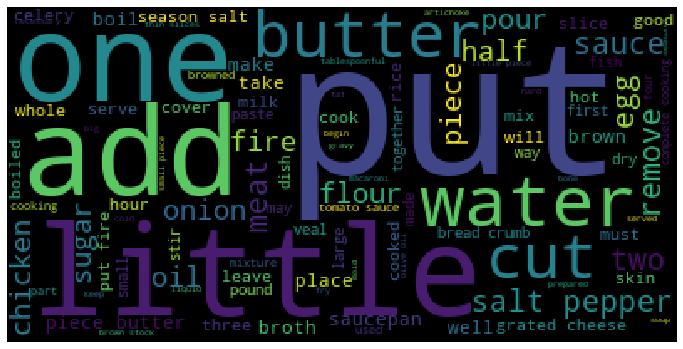

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(max_words=100)
cloud.generate_from_text(' '.join(all_tokens_lower))

plt.figure(figsize=(12,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()